In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 52kB/s 


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/cotton_disease/train'
valid_path = '/content/drive/My Drive/cotton_disease/test'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/cotton_disease/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/cotton_disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/cotton_disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 968s 16s/step - loss: 2.7903 - accuracy: 0.7319 - val_loss: 0.7939 - val_accuracy: 0.7778
Epoch 2/20
61/61 [==============================] - 36s 587ms/step - loss: 0.9661 - accuracy: 0.8611 - val_loss: 0.3986 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 35s 575ms/step - loss: 0.5732 - accuracy: 0.9067 - val_loss: 0.5288 - val_accuracy: 0.8333
Epoch 4/20
61/61 [==============================] - 35s 570ms/step - loss: 0.6177 - accuracy: 0.9077 - val_loss: 0.5922 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 35s 567ms/step - loss: 0.7547 - accuracy: 0.9057 - val_loss: 7.5238e-05 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 35s 571ms/step - loss: 0.5259 - accuracy: 0.9195 - val_loss: 0.1718 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 35s 574ms/s

In [17]:
import matplotlib.pyplot as plt

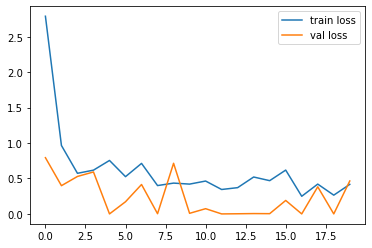

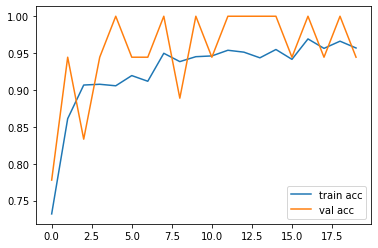

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:

y_pred

array([[6.49469775e-24, 3.02467955e-35, 1.00000000e+00, 5.27353229e-38],
       [2.70420741e-10, 2.42361927e-14, 1.00000000e+00, 5.24310532e-22],
       [2.39997677e-35, 6.96676047e-38, 5.14358207e-28, 1.00000000e+00],
       [2.03008472e-28, 1.00000000e+00, 1.11637814e-20, 3.14059789e-22],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.83518879e-31],
       [9.37155412e-19, 3.55133700e-09, 1.38670623e-06, 9.99998569e-01],
       [4.20715723e-18, 1.55052254e-02, 2.36349933e-16, 9.84494746e-01],
       [9.99991417e-01, 2.27331768e-34, 8.57400391e-06, 7.29989054e-25],
       [4.31507822e-24, 4.61906488e-17, 1.00000000e+00, 1.38007795e-22],
       [6.27901166e-28, 1.00000000e+00, 1.55723891e-20, 5.96858193e-17],
       [0.00000000e+00, 1.00000000e+00, 2.43462473e-24, 2.85274912e-29],
       [2.11851563e-18, 4.46981262e-27, 1.00000000e+00, 1.76210076e-35],
       [9.40658073e-37, 2.16066991e-11, 2.27312443e-38, 1.00000000e+00],
       [5.44075334e-20, 4.03720612e-09, 1.00000000e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 2, 3, 1, 1, 3, 3, 0, 2, 1, 1, 2, 3, 2, 0, 1, 0, 1])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_inception.h5')